In [8]:
import gym
import highway_env
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C

env = gym.make('ma-highway-v0')


In [9]:
from matplotlib import pyplot as pyplot
%matplotlib inline

c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "
c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:298: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  "No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps."


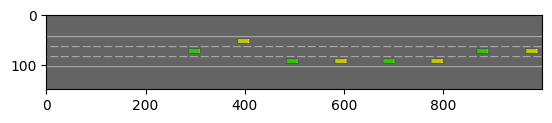

In [3]:
env.configure(  {
                "speed_limit": 20,
                "vehicles_density": 1,
                "ego_spacing": 1,
                "road_length":10000, 
                "simulation_frequency":15, 
                "duration":40,
                "DLC_config": {
                    "count": 5,
                    "reward_speed_range": [20, 40],
                    "weights": [10,5,1,1],
                        },
                "MLC_config": {
                    "count":10 ,
                    "reward_speed_range": [20, 30],
                    "weights": [10,5,1,1]
                        } 
                })
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()

In [10]:
# Visualization utils
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
%tensorboard --logdir "highway_a2c/"

Reusing TensorBoard on port 6006 (pid 18088), started 0:00:03 ago. (Use '!kill 18088' to kill it.)

In [16]:
import os 

#MODEL TRAINING
A2C_path = os.path.join('Training', 'Saved Models', 'A2C_model')

model = A2C('MultiInputPolicy', env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=5e-4,
            gamma=0.8,
            verbose=1,
            tensorboard_log="highway_a2c/",
            normalize_advantage=True)

model.learn(total_timesteps=int(1e5))

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_a2c/A2C_3
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.45     |
|    ep_rew_mean        | 2.22     |
| time/                 |          |
|    fps                | 1        |
|    iterations         | 100      |
|    time_elapsed       | 275      |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -21.1    |
|    explained_variance | 0.374    |
|    learning_rate      | 0.0005   |
|    n_updates          | 99       |
|    policy_loss        | -0.422   |
|    value_loss         | 0.239    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 3.02     |
|    ep_rew_mean        | 2.83     |
| time/                 |          |
|    fps                | 1        |
|    iterations         |

In [17]:
#MODEL SAVING
model.save(A2C_path)

In [18]:
from tqdm.notebook import trange

###MODEL TESTING###
model = PPO.load('Training/Saved Models/A2C_model', env=env)
for episode in trange(10, desc="Test episodes"):
    obs, done = env.reset(), False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        print(info)
        env.render('human')
env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Test episodes:   0%|          | 0/10 [00:00<?, ?it/s]

{'speed': 23.102962356710236, 'crashed': False, 'action': array([0, 4, 3, 4, 0, 4, 4, 2, 0, 4, 4, 1, 3, 4, 2], dtype=int64), 'rewards': [{'proactive_mlc_reward': [0.09270364821226292, 2], 'collision_penalty': [0, 10], 'lane change penalty': [-1, 1], 'high_speed_reward': [0.30367138233337376, 1]}, {'proactive_dlc_reward': [0.6826413557465724, 2], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1], 'high_speed_reward': [0.3652827114931448, 1]}, {'proactive_mlc_reward': [0.13125401937431927, 2], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1], 'high_speed_reward': [0.5155776249096305, 1]}, {'proactive_dlc_reward': [0.68100838719756, 2], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1], 'high_speed_reward': [0.36201677439512, 1]}, {'proactive_mlc_reward': [0.16771097032442447, 2], 'collision_penalty': [0, 10], 'lane change penalty': [-1, 1], 'high_speed_reward': [0.3236214456823582, 1]}, {'proactive_dlc_reward': [0.6787046033838943, 2], 'collision_penalty': 